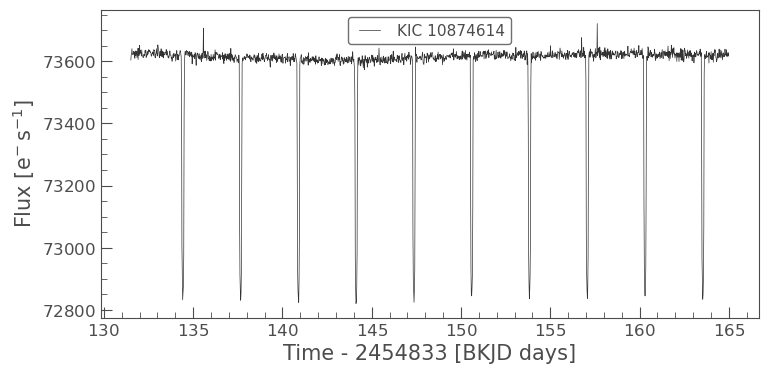

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.timeseries import LombScargle
import lightkurve as lk
import os

klc = lk.search_lightcurve("Kepler-6", author="Kepler", cadence="long",quarter=1).download().remove_nans() #Search database for specified target
#klc=lk.read('kplr010418224-2009259160929_llc.fits') #Read in files if required
klc.plot() #Plotting lightkurve
plt.show()

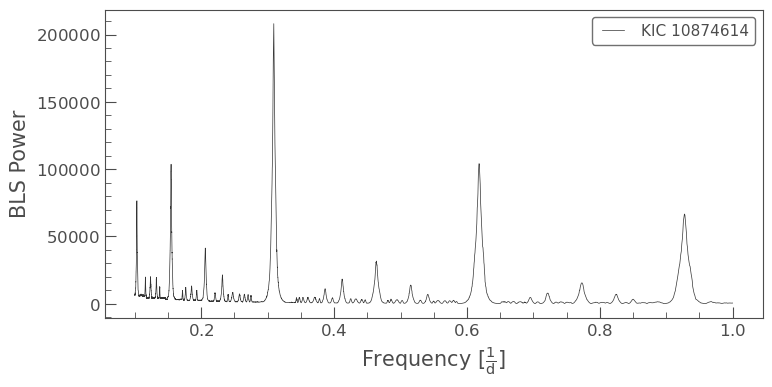

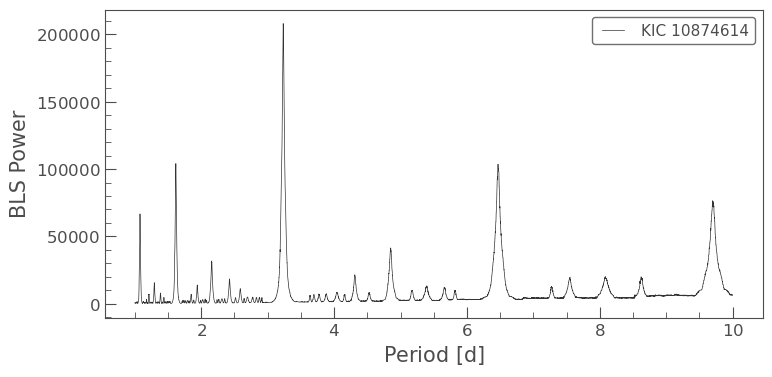

In [15]:
period = np.linspace(1, 10, 10000)
bls = klc.to_periodogram(method='bls', period=period, frequency_factor=500) #Plotting periodogram
bls.plot(view='frequency')
bls.plot()
plt.show()

In [16]:
#pg.plot(view='period',scale='log') #Log scale if required
#plt.show()

In [17]:
pmax=bls.period_at_max_power #Period calculated from frequency at max power
print(pmax)

3.234023402340234 d


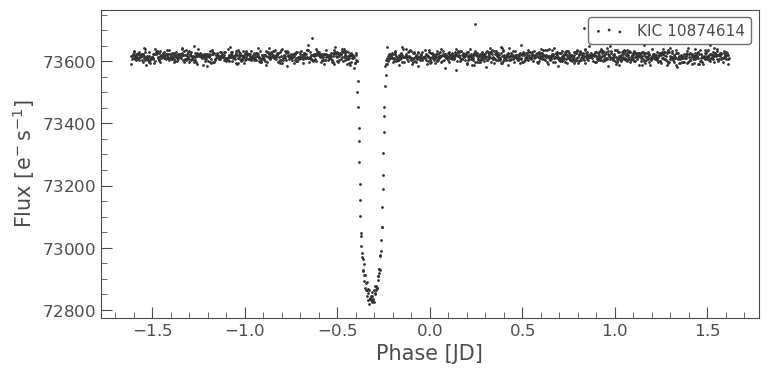

3.234023402340234 d


In [18]:
correction = 1 #correction made to calculated period depending on pase plot
klc.fold(period=correction*pmax).scatter()
plt.show()
true_period = correction*pmax
print(true_period)